In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle, islice

%matplotlib inline

In [2]:
entrenamiento_df = pd.read_csv('setDeDatos/nlp-getting-started/train.csv')

In [8]:
entrenamiento_df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
entrenamiento_df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [5]:
entrenamiento_df['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
harm                     41
sinking                  41
body%20bags              41
damage                   41
outbreak                 40
twister                  40
windstorm                40
siren                    40
evacuate                 40
fear                     40
collided                 40
earthquake               39
sinkhole                 39
explosion                39
wreckage                 39
derailment               39
weapon                   39
collision                39
famine                   39
flames                   39
sunk                     39
wrecked                  39
hellfire                 39
weapons                  39
whirlwind                39
derailed                 38
typhoon                  38
                         ..
suicide%20bomber         31
trauma                   31
terrorist                31
avalanche                30
bioterrorism        

In [3]:
# Reemplazo el error en el espaciado de las keyword
entrenamiento_df['keyword'] = entrenamiento_df['keyword'].str.replace('%20', ' ')
entrenamiento_df.keyword.value_counts()

fatalities             45
deluge                 42
armageddon             42
damage                 41
sinking                41
body bags              41
harm                   41
windstorm              40
siren                  40
outbreak               40
evacuate               40
fear                   40
twister                40
collided               40
whirlwind              39
collision              39
flames                 39
derailment             39
famine                 39
explosion              39
weapons                39
sinkhole               39
wreckage               39
earthquake             39
wrecked                39
sunk                   39
hellfire               39
weapon                 39
bombed                 38
hurricane              38
                       ..
terrorist              31
suicide bomber         31
crushed                31
mayhem                 30
bioterrorism           30
dead                   30
catastrophic           30
survivors   

In [7]:
entrenamiento_df['location'].value_counts()

USA                               104
New York                           71
United States                      50
London                             45
Canada                             29
Nigeria                            28
UK                                 27
Los Angeles, CA                    26
India                              24
Mumbai                             22
Washington, DC                     21
Kenya                              20
Worldwide                          19
Australia                          18
Chicago, IL                        18
California                         17
California, USA                    15
New York, NY                       15
Everywhere                         15
San Francisco                      14
United Kingdom                     14
Florida                            14
Los Angeles                        13
Washington, D.C.                   13
Indonesia                          13
Toronto                            12
NYC         

In [4]:
# Agrupo USA y United States
entrenamiento_df['location'] = entrenamiento_df['location'].replace({'United States':'USA'})
entrenamiento_df['location'].value_counts()

USA                             154
New York                         71
London                           45
Canada                           29
Nigeria                          28
UK                               27
Los Angeles, CA                  26
India                            24
Mumbai                           22
Washington, DC                   21
Kenya                            20
Worldwide                        19
Chicago, IL                      18
Australia                        18
California                       17
Everywhere                       15
California, USA                  15
New York, NY                     15
United Kingdom                   14
Florida                          14
San Francisco                    14
Los Angeles                      13
Washington, D.C.                 13
Indonesia                        13
NYC                              12
Toronto                          12
Ireland                          12
Chicago                     

In [9]:
entrenamiento_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [5]:
test_df = pd.read_csv('setDeDatos/nlp-getting-started/test.csv')
test_df.head(5)


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
# Agrupo USA y United States
test_df['location'] = test_df['location'].replace({'United States':'USA'})
test_df['location'].value_counts()

USA                               52
New York                          38
Worldwide                         16
Canada                            13
London                            13
United Kingdom                    12
Kenya                             12
Nigeria                           12
Los Angeles                       11
India                             11
Washington, DC                    10
San Francisco, CA                  9
Philippines                        9
NYC                                9
San Francisco                      9
California                         8
Los Angeles, CA                    8
Australia                          7
Seattle, WA                        7
Florida                            7
New York, NY                       7
Singapore                          7
Chicago                            6
California, USA                    6
Melbourne, Australia               6
Mumbai                             6
UK                                 6
D

In [7]:
# Reemplazo el error en el espaciado de las keyword
test_df['keyword'] = test_df['keyword'].str.replace('%20', ' ')
test_df.keyword.value_counts()

deluged                23
demolished             22
rubble                 22
annihilation           21
snowstorm              21
obliteration           21
sirens                 21
first responders       21
seismic                21
catastrophic           20
survivors              20
mayhem                 20
avalanche              20
bioterrorism           20
dead                   20
wild fires             19
devastated             19
suicide bomber         19
hostage                19
obliterate             19
crushed                19
terrorist              19
trauma                 19
obliterated            19
apocalypse             18
trapped                18
detonation             18
arson                  18
hailstorm              18
drown                  18
                       ..
famine                 11
derailment             11
wrecked                11
weapons                11
hellfire               11
wreckage               11
sinkhole               11
weapon      

In [8]:
# 'longitud_text' contiene la longitud de la columna 'text'. 
test_df['text']=test_df['text'].astype(str)
test_df['longitud_text']=test_df.text.str.len()
test_df.head(10)

,id,keyword,location,text,longitud_text
0,0,NaN,NaN,Just happened a terrible car crash,34
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",64
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",96
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,40
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,45
5,12,NaN,NaN,We're shaking...It's an earthquake,34
6,21,NaN,NaN,They'd probably still show more life than Arse...,72
7,22,NaN,NaN,Hey! How are you?,17
8,27,NaN,NaN,What a nice hat?,16
9,29,NaN,NaN,Fuck off!,9


In [9]:
#agrego columna: cantidad de palabras de text

test_df['cantidad_palabras']=test_df['text'].apply(lambda x: len(x.split()) )
test_df.head(5)

,id,keyword,location,text,longitud_text,cantidad_palabras
0,0,NaN,NaN,Just happened a terrible car crash,34,6
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",64,9
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",96,19
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,40,4
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,45,8


In [10]:
# 'longitud_text' contiene la longitud de la columna 'text'. 
entrenamiento_df['text']=entrenamiento_df['text'].astype(str)
entrenamiento_df['longitud_text']=entrenamiento_df.text.str.len()
entrenamiento_df.head(5)

,id,keyword,location,text,target,longitud_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [11]:
#agrego columna: cantidad de palabras de text

entrenamiento_df['cantidad_palabras']=entrenamiento_df['text'].apply(lambda x: len(x.split()) )
entrenamiento_df.head(5)


,id,keyword,location,text,target,longitud_text,cantidad_palabras
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16


In [122]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 6 columns):
id                   3263 non-null int64
keyword              3237 non-null object
location             2158 non-null object
text                 3263 non-null object
longitud_text        3263 non-null int64
cantidad_palabras    3263 non-null int64
dtypes: int64(3), object(3)
memory usage: 153.0+ KB


In [123]:
entrenamiento_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 7 columns):
id                   7613 non-null int64
keyword              7552 non-null object
location             5080 non-null object
text                 7613 non-null object
target               7613 non-null int64
longitud_text        7613 non-null int64
cantidad_palabras    7613 non-null int64
dtypes: int64(4), object(3)
memory usage: 416.4+ KB


In [12]:
## librerias para entrenar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [13]:
#defino las entradas x e y

x = np.array(entrenamiento_df[['longitud_text','cantidad_palabras']])
y = np.array(entrenamiento_df['target'])
 

In [14]:

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

/home/gaston/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


([<matplotlib.axis.XTick at 0x7f3882aefe50>,
 <a list of 13 Text xticklabel objects>)

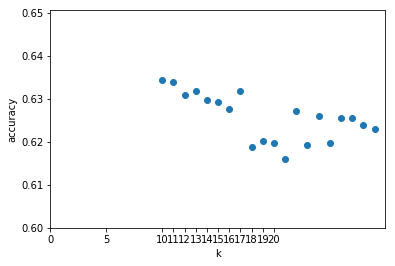

In [15]:
# elegir k
k_range = range(10, 30)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,11,12,13,14,15,16,17,18,19,20])

In [128]:
# pruebo k =14
vecinos = 14
 
knn = KNeighborsClassifier(vecinos)
knn.fit(x_train, y_train)
print('Accuracy K-NN en set de entrenamiento: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Accuracy K-NN en set de test: {:.2f}'
     .format(knn.score(x_test, y_test)))

Accuracy K-NN en set de entrenamiento: 0.69
Accuracy K-NN en set de test: 0.63


In [129]:
#clasificador
clasificador = KNeighborsClassifier(vecinos, weights='distance')
clasificador.fit(x, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=14, p=2,
           weights='distance')

In [130]:
#pruebo el modelo

z = np.array(test_df[['longitud_text','cantidad_palabras']])


In [131]:
predictions = clasificador.predict(z)


In [132]:
submit = pd.read_csv('setDeDatos/nlp-getting-started/sample_submission.csv')

In [133]:
submit['target'] = pd.DataFrame({'target':predictions})
submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 2 columns):
id        3263 non-null int64
target    3263 non-null int64
dtypes: int64(2)
memory usage: 51.1 KB


In [134]:
submit.head(5)

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [135]:
submit.to_csv('Submits_KNN/submit_KNN_14.csv', index=False)